In [62]:
import numpy as np
from scipy.stats import bernoulli
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_tree(depth,degree):
    tree = {}
    tree['children'] = []
    if depth > 0:
        for i in range(degree):
            tree['children'].append(get_tree(depth-1,degree))
    return tree

#assumes root is assigned, propagates to children
def broadcast(root,eps):
    for child in root['children']:
        coin = bernoulli.rvs(0.5+eps)
        if coin==1:
            child['sign'] = root['sign']
        else:
            child['sign'] = 1-root['sign']
        broadcast(child,eps)
        
        
def infer_root_p1(root,eps):
    if root['children'] == []:
        root['p1'] = root['sign']
    else:
        for child in root['children']:
            infer_root_p1(child,eps)
        
        weights1 = [(0.5+eps)*child['p1'] + (0.5-eps)*(1 - child['p1']) for child in root['children']]
        weights0 = [(0.5-eps)*child['p1'] + (0.5+eps)*(1-child['p1']) for child in root['children']]
        
        w1 = np.prod(weights1)
        w0 = np.prod(weights0)
        z = w1 + w0
        root['p1'] = w1/z

def assign_leaf_potentials(root,f):
    if root['children'] == []:
        if root['sign'] == 1:
            root['sign'] = f()
        else:
            root['sign'] = 1-f()
    else:
        for child in root['children']:
            assign_leaf_potentials(child,f)

In [89]:
def get_empirical_dist(depth,degree,eps):
    emp_dist = []
    for i in range(10000):
        t = get_tree(depth,degree)
        t['sign'] = 1
        broadcast(t,eps)
        infer_root_p1(t,eps)
        emp_dist.append(t['p1'])
    return emp_dist

In [90]:
theta = get_empirical_dist(8,2,0.35)

0.5962453160692799
0.1971978337388209


(array([ 16.,  13.,  31.,  34.,  52.,  65.,  74.,  76., 106., 124., 108.,
        120., 104., 150., 130., 163., 171., 189., 193., 204., 215., 212.,
        233., 227., 224., 257., 278., 283., 280., 304., 296., 287., 308.,
        299., 301., 301., 313., 309., 316., 348., 314., 329., 305., 292.,
        277., 244., 217., 183.,  94.,  31.]),
 array([0.07528891, 0.09265596, 0.11002301, 0.12739006, 0.14475712,
        0.16212417, 0.17949122, 0.19685827, 0.21422532, 0.23159237,
        0.24895942, 0.26632648, 0.28369353, 0.30106058, 0.31842763,
        0.33579468, 0.35316173, 0.37052878, 0.38789584, 0.40526289,
        0.42262994, 0.43999699, 0.45736404, 0.47473109, 0.49209814,
        0.5094652 , 0.52683225, 0.5441993 , 0.56156635, 0.5789334 ,
        0.59630045, 0.6136675 , 0.63103456, 0.64840161, 0.66576866,
        0.68313571, 0.70050276, 0.71786981, 0.73523687, 0.75260392,
        0.76997097, 0.78733802, 0.80470507, 0.82207212, 0.83943917,
        0.85680623, 0.87417328, 0.89154033, 0.

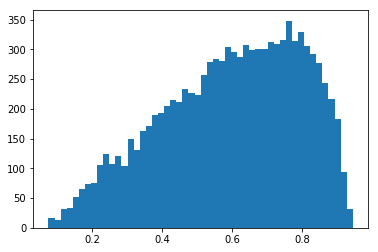

In [92]:
print(np.mean(theta))
print(np.sqrt(np.var(theta)))
plt.hist(theta,50)

0.5675443033759188
0.17045469380989423


(array([  2.,   8.,  10.,  16.,  31.,  41.,  51.,  67.,  89.,  87., 131.,
        123., 167., 140., 172., 180., 193., 199., 235., 251., 244., 313.,
        280., 274., 323., 302., 312., 318., 324., 346., 324., 369., 337.,
        333., 369., 327., 335., 320., 330., 297., 260., 256., 240., 203.,
        175., 115., 100.,  56.,  20.,   5.]),
 array([0.08805075, 0.1048327 , 0.12161465, 0.1383966 , 0.15517855,
        0.17196049, 0.18874244, 0.20552439, 0.22230634, 0.23908829,
        0.25587024, 0.27265219, 0.28943414, 0.30621609, 0.32299804,
        0.33977999, 0.35656193, 0.37334388, 0.39012583, 0.40690778,
        0.42368973, 0.44047168, 0.45725363, 0.47403558, 0.49081753,
        0.50759948, 0.52438143, 0.54116338, 0.55794532, 0.57472727,
        0.59150922, 0.60829117, 0.62507312, 0.64185507, 0.65863702,
        0.67541897, 0.69220092, 0.70898287, 0.72576482, 0.74254676,
        0.75932871, 0.77611066, 0.79289261, 0.80967456, 0.82645651,
        0.84323846, 0.86002041, 0.87680236, 0.

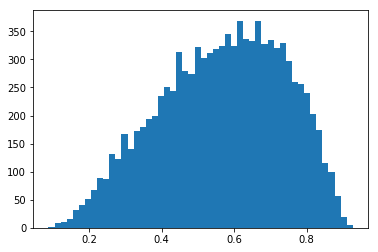

In [96]:
# testing fixed-point ness

def f():
    return random.choice(theta)

emp_dist = []
for i in range(10000):
    t = get_tree(4,2)
    t['sign'] = 1
    broadcast(t,0.35)
    assign_leaf_potentials(t,f)
    infer_root_p1(t,0.35)
    emp_dist.append(t['p1'])

print(np.mean(emp_dist))
print(np.sqrt(np.var(emp_dist)))

plt.hist(emp_dist,50)

0.5739788216649723
0.18615668214160264


(array([  0.,   2.,   2.,   3.,   9.,  21.,  34.,  42.,  65.,  86.,  90.,
        107., 125., 161., 166., 157., 194., 250., 237., 246., 253., 296.,
        242., 280., 321., 345., 358., 344., 387., 384., 370., 372., 387.,
        363., 380., 400., 353., 381., 315., 307., 293., 241., 219., 170.,
        117.,  83.,  31.,   9.,   1.,   0.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

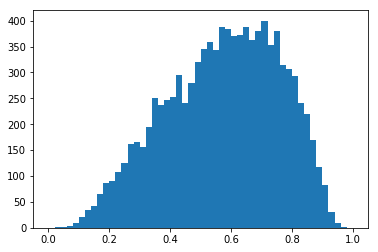

In [99]:
# testing universality

def f():
    return 0.59 + 0.2*np.random.randn()

emp_dist = []
for i in range(10000):
    t = get_tree(2,2)
    t['sign'] = 1
    broadcast(t,0.35)
    assign_leaf_potentials(t,f)
    infer_root_p1(t,0.35)
    emp_dist.append(t['p1'])

print(np.mean(emp_dist))
print(np.sqrt(np.var(emp_dist)))
plt.hist(emp_dist,50,range=[0,1])

True

In [55]:
np.random.randn()

0.9596281157468194